<br>
<font size="5">
Project Goals

This project predicts obesity using Decision Tree, Bagging, RandomForest, and GradientBoosting as classifiers. The dataset, sourced from Kaggle, contains multiple features related to dietary habits, physical activity, and other factors influencing obesity. Based on these features, each observation of the test data will be classified by the four models as one of the seven weight categories. Evaluation of each model is then made using accuracy as the metrics and as it turned out, of the four, GradientBoosting has best performance.

<br>
Import Libraries

In [788]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import statistics  
from sklearn.metrics import classification_report as cr
from sklearn.metrics import classification_report,roc_curve
from sklearn import metrics 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC as svc
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda 
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd
from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
#Libraries for model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

#Libraries for models
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor,Ridge
from sklearn.tree import plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error as mlse
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

<br>
<font size="5">
Data Import

In [790]:
df_train = pd.read_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-5/CSV/train.csv')
X_test = pd.read_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-5/CSV/test.csv')

## Explore Data

In [792]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<br>
Dimension of train data

In [794]:
df_train.shape

(20758, 18)

In [795]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<br>
Obesity Class Distribution

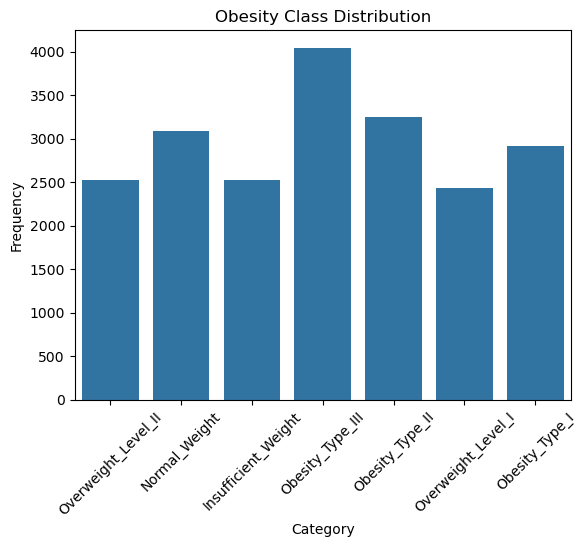

In [797]:
sns.countplot(x="NObeyesdad", data = df_train)
 
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Obesity Class Distribution")
plt.xticks(rotation = 45)
plt.show()

<br>
Histograms for numeric features

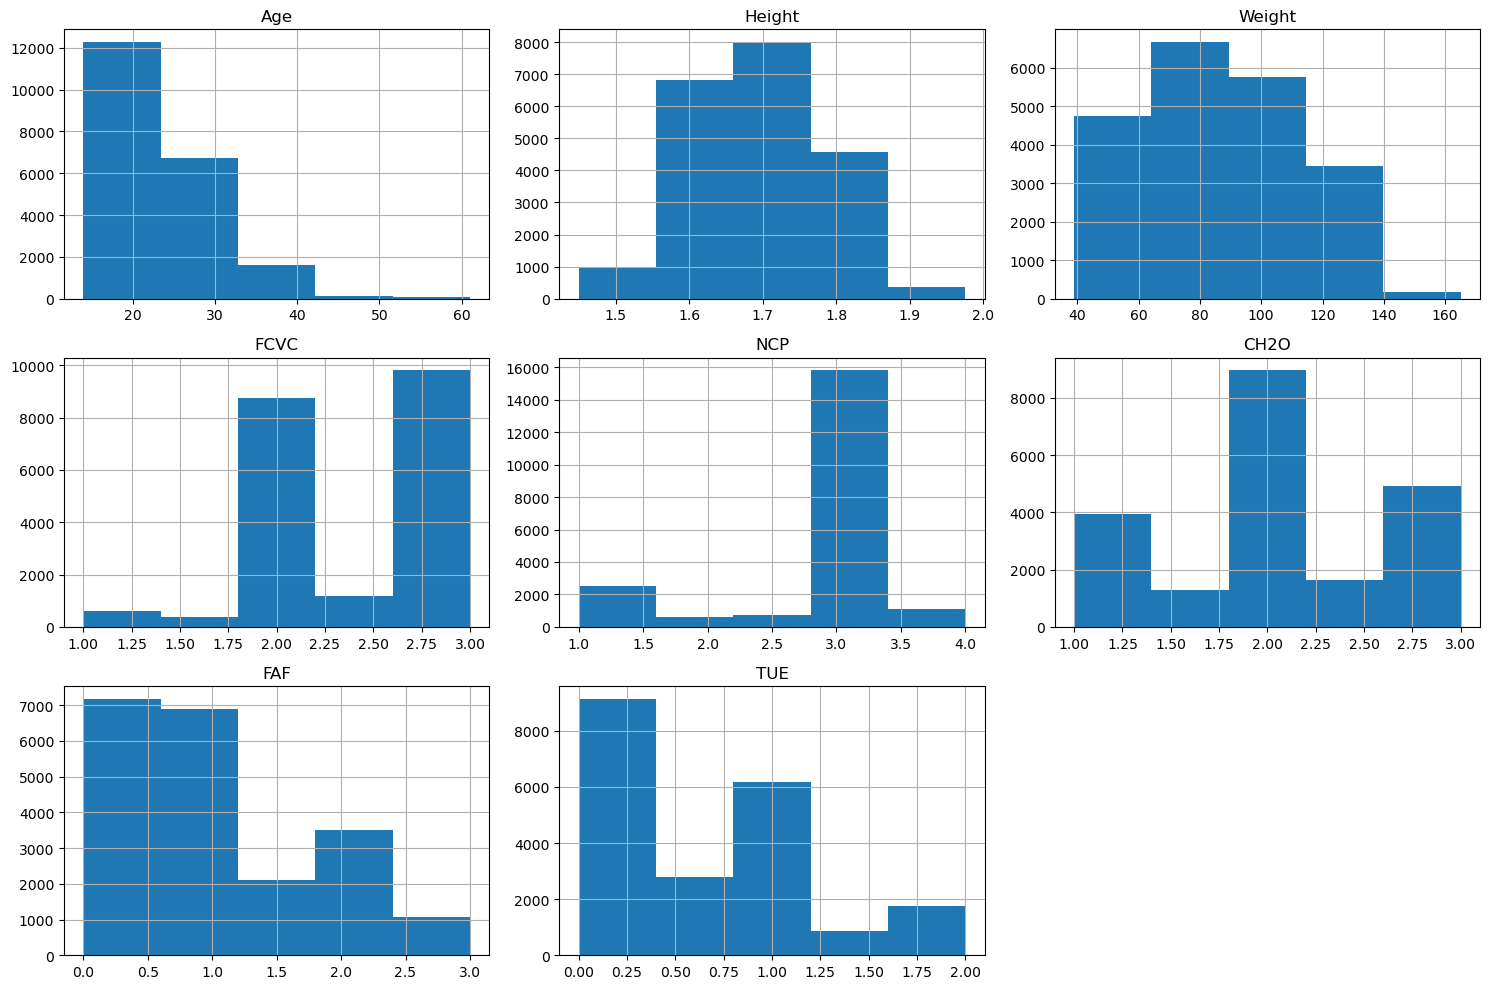

In [799]:
# Assuming df is your DataFrame
def plot_histograms(df_train):
    numeric_columns = df_train.select_dtypes(include=['number']).columns
    df_train[numeric_columns].hist(bins=5, figsize=(15, 10), layout=(len(numeric_columns) // 3 + 1, 3))
    plt.tight_layout()
    plt.show()
df_train = df_train.drop(['id'],axis = 1)    
plot_histograms(df_train)    

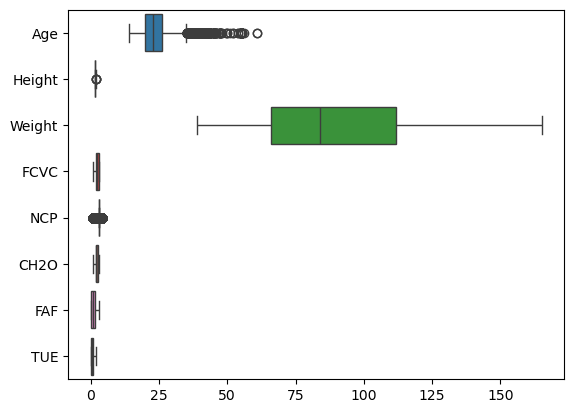

In [800]:
sns.boxplot( data = df_train, orient="h")
# display
plt.show()

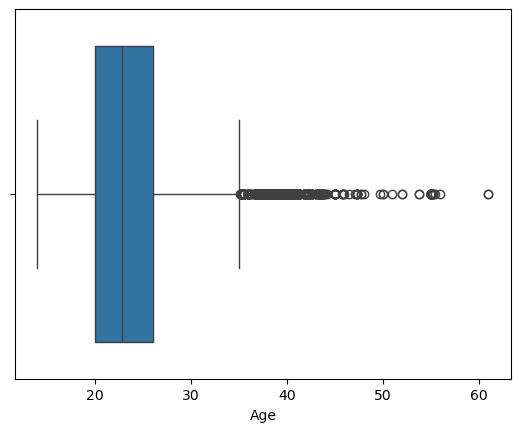

In [801]:
sns.boxplot( data = df_train.Age, orient="h")
# display
plt.show()

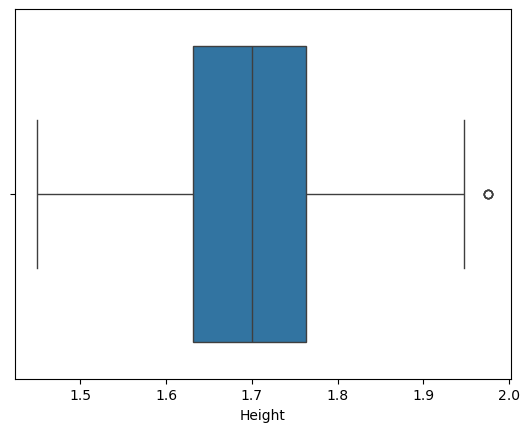

In [802]:
sns.boxplot( data = df_train.Height, orient="h")
# display
plt.show()

<br>
Correlation Matrix for numeric features

In [804]:
df_train.corr(numeric_only=True)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


<br>
Correlation Heatmap

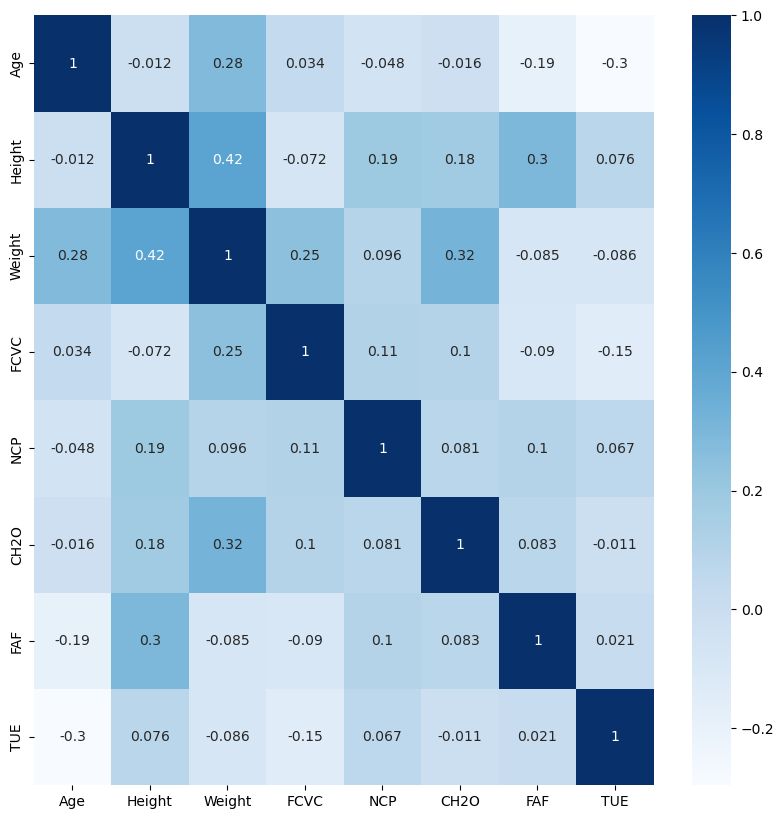

In [806]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='Blues');

<br>
<br>
Weight Categories in target variable 'NObeyesdad'

In [808]:
df_train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

<br>
<br>
Column Names

In [810]:
df_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [811]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [812]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [813]:
df_train.duplicated().sum()

0

In [814]:
df_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Transform Data

In [816]:
la = LabelEncoder()
la1 = LabelEncoder()

In [817]:
df_train_obj = df_train.select_dtypes(include='object')
df_train_non_obj = df_train.select_dtypes(exclude='object')

In [818]:
X_test_obj = X_test.select_dtypes(include='object')
X_test_non_obj = X_test.select_dtypes(exclude='object')

In [819]:
# Tranform object data to numeric in df_train 
for i in range(0 , df_train_obj.shape[1]):
    df_train_obj.iloc[:,i]=la.fit_transform(df_train_obj.iloc[:,i])
df_train_obj = df_train_obj.astype('int')

# Tranform object data to numeric in X_test 
for i in range(0 , X_test_obj.shape[1]):
    X_test_obj.iloc[:,i]=la1.fit_transform(X_test_obj.iloc[:,i])
X_test_obj = X_test_obj.astype('int')

<br>
Lexicographical Order of target variable NObeyesdad

In [821]:
print(la.classes_)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [822]:
df_train_obj.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6


In [823]:
df_train_obj["NObeyesdad"].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

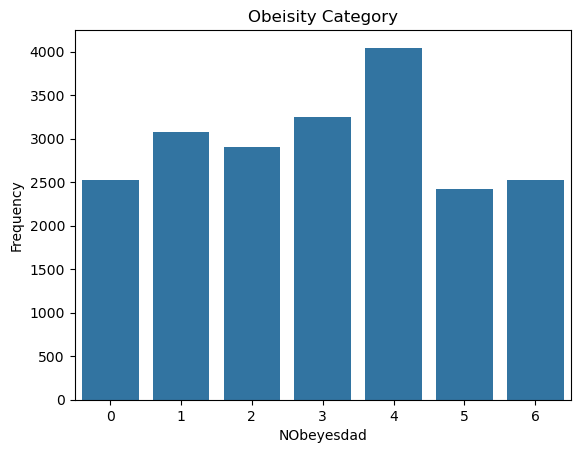

In [824]:
sns.countplot(x="NObeyesdad", data = df_train_obj)
plt.xlabel("NObeyesdad")
plt.ylabel("Frequency")
plt.title("Obeisity Category")
plt.show()

In [825]:
X_test_obj

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,1,1,1,2,0,0,2,3
1,0,1,1,2,0,0,2,3
2,0,1,1,2,0,0,2,3
3,1,1,1,2,0,0,2,3
4,0,1,1,2,0,0,2,3
...,...,...,...,...,...,...,...,...
13835,1,1,0,2,0,0,2,3
13836,0,0,1,2,0,0,2,3
13837,0,0,1,1,0,0,2,3
13838,1,1,1,2,0,0,3,3


In [826]:
df_train_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          20758 non-null  int32
 1   family_history_with_overweight  20758 non-null  int32
 2   FAVC                            20758 non-null  int32
 3   CAEC                            20758 non-null  int32
 4   SMOKE                           20758 non-null  int32
 5   SCC                             20758 non-null  int32
 6   CALC                            20758 non-null  int32
 7   MTRANS                          20758 non-null  int32
 8   NObeyesdad                      20758 non-null  int32
dtypes: int32(9)
memory usage: 729.9 KB


In [827]:
data =pd.concat([df_train_obj, df_train_non_obj], axis=1)
X_test =pd.concat([X_test_obj, X_test_non_obj], axis=1)

In [828]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [829]:
df_train.shape

(20758, 17)

In [830]:
ss =StandardScaler()

<br>
<br>
Age and Weight have large range of values and need scalings

In [832]:
data['Age'] = ss.fit_transform(data[['Age']]) 
data['Weight'] = ss.fit_transform(data[['Weight']])

X_test['Age'] = ss.fit_transform(X_test[['Age']])
X_test['Weight'] = ss.fit_transform(X_test[['Weight']])

In [833]:
data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3,0.227725,1.766626,0.996987,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,0,-1.027052,1.710000,-1.436296,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,3,-0.657669,1.819557,0.670717,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,6,1.760067,1.700000,-0.165574,2.671238,1.971472,2.144838,0.000000,0.973834


In [834]:
data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721


In [835]:
X_test.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,0.508163,1.848294,1.273786,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,-0.509128,1.600000,-0.818988,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,0.353000,1.643355,0.927432,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,-0.512705,1.553127,0.623672,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,0.353000,1.627396,0.668336,3.000000,3.000000,2.653531,0.000000,0.741069


## Modeling

In [837]:
#x = data.drop(['NObeyesdad', 'id'], axis=1)
x = data.drop(['NObeyesdad'], axis=1)
y = data['NObeyesdad']

In [838]:
test_data = X_test.drop('id', axis=1)

In [839]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=21)

In [840]:
x_val.shape

(4152, 16)

<br>
1)   DecisionTree Classifier()

In [842]:
model_dt = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
# evaluate the model and collect the scores 
n_scores = cross_val_score(model_dt, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [843]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mydt=model_dt.fit(x_train, y_train) 
print(mydt.score(x_train, y_train)) 
mypred=mydt.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.846 (0.009)
1.0
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       519
           1       0.81      0.80      0.80       631
           2       0.83      0.79      0.81       599
           3       0.94      0.95      0.94       607
           4       0.99      1.00      0.99       819
           5       0.69      0.69      0.69       486
           6       0.71      0.73      0.72       491

    accuracy                           0.85      4152
   macro avg       0.84      0.84      0.84      4152
weighted avg       0.85      0.85      0.85      4152



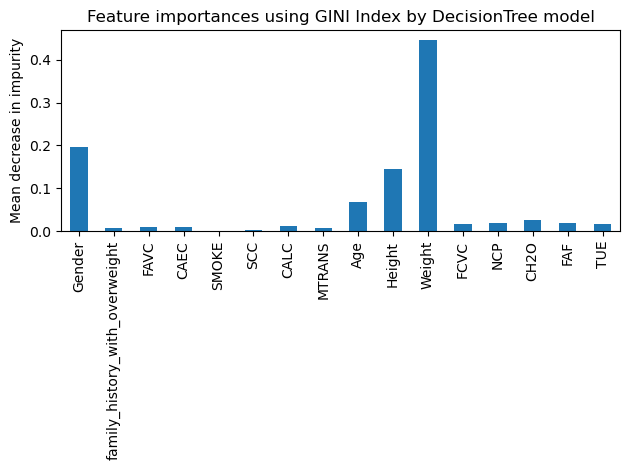

In [844]:
feature_names = x_train.columns
importances = model_dt.feature_importances_
decisiontree_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
decisiontree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using GINI Index by DecisionTree model")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<Axes: >

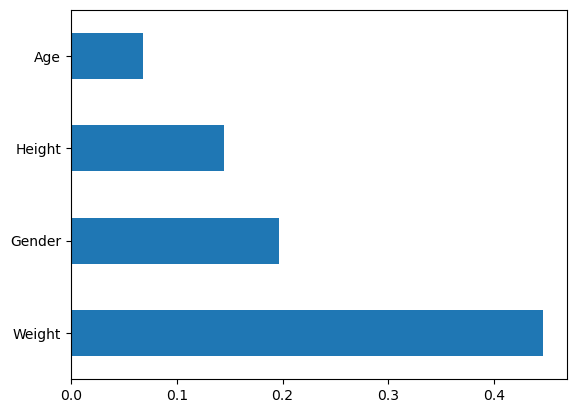

In [845]:
feat_importances = pd.Series(model_dt.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

Figure 1: Confusion Matrix for DecisionTree Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


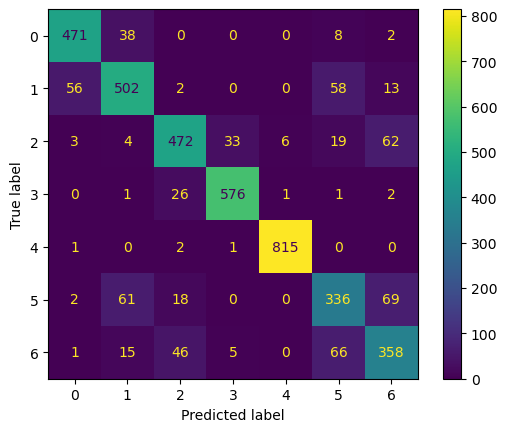

In [846]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print('Figure 1: Confusion Matrix for DecisionTree Model')
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

<br>
2) Bagging Classifier (decisiontree as algorithm)

In [848]:
model_bag =BaggingClassifier(n_estimators=30) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
# evaluate the model and collect the scores 
n_scores = cross_val_score(model_bag, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [849]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mybag=model_bag.fit(x_train, y_train) 
print(mybag.score(x_train, y_train)) 
mypred=mybag.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.890 (0.006)
0.9984343008551126
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       519
           1       0.85      0.87      0.86       631
           2       0.88      0.87      0.88       599
           3       0.96      0.96      0.96       607
           4       1.00      1.00      1.00       819
           5       0.79      0.74      0.76       486
           6       0.79      0.80      0.80       491

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152



Figure 2: Confusion Matrix for Bagging Classifier Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


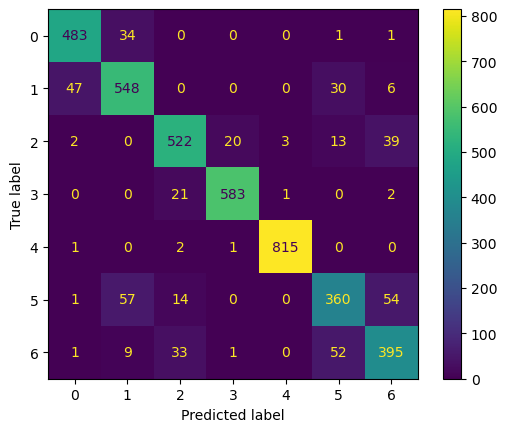

In [850]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print('Figure 2: Confusion Matrix for Bagging Classifier Model')
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

<br>
3) RandomForestClassifier

In [852]:
model_rf=RandomForestClassifier() 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
# evaluate the model and collect the scores 
n_scores = cross_val_score(model_rf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [853]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
myrf=model_rf.fit(x_train, y_train) 
print(myrf.score(x_train, y_train)) 
mypred=myrf.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.899 (0.008)
1.0
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       519
           1       0.85      0.90      0.88       631
           2       0.90      0.87      0.88       599
           3       0.96      0.97      0.97       607
           4       1.00      1.00      1.00       819
           5       0.83      0.73      0.78       486
           6       0.79      0.83      0.81       491

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



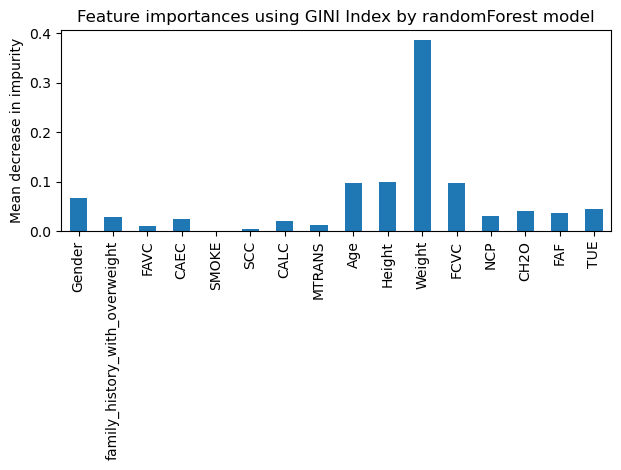

In [854]:
feature_names = x_train.columns
importances = model_rf.feature_importances_
decisiontree_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
decisiontree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using GINI Index by randomForest model")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<Axes: >

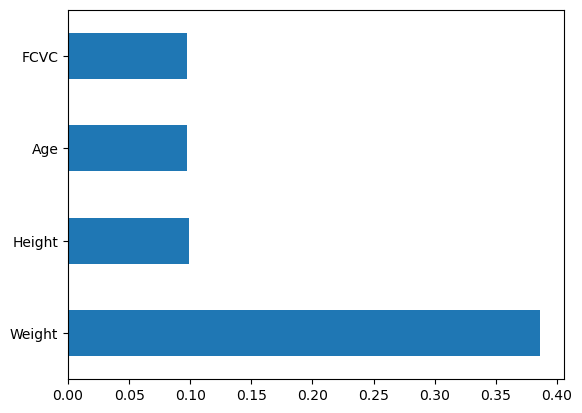

In [855]:
feat_importances = pd.Series(model_rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

Figure 3: Confusion Matrix for RandomForest Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


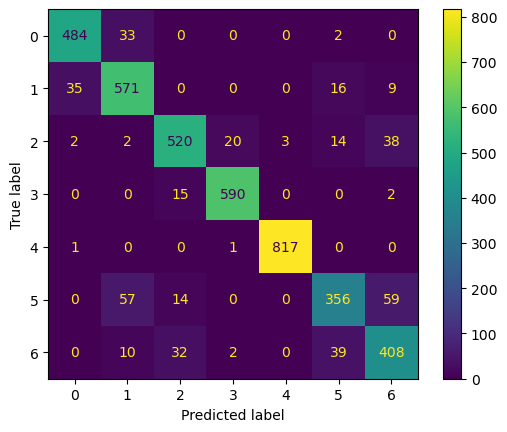

In [856]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print('Figure 3: Confusion Matrix for RandomForest Model')
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

4) GradientBoostingClassifier

In [858]:
model_gbc = gbc()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
#evaluate the model and collect the scores 
n_scores = cross_val_score(model_gbc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [859]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mygbc=model_gbc.fit(x_train, y_train) 
print(mygbc.score(x_train, y_train)) 
mypred=mygbc.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.904 (0.009)
0.9220763579429122
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       519
           1       0.87      0.90      0.88       631
           2       0.91      0.88      0.89       599
           3       0.96      0.97      0.97       607
           4       1.00      1.00      1.00       819
           5       0.84      0.78      0.81       486
           6       0.80      0.84      0.82       491

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



Figure 4: Confusion Matrix for GradientBoosting Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


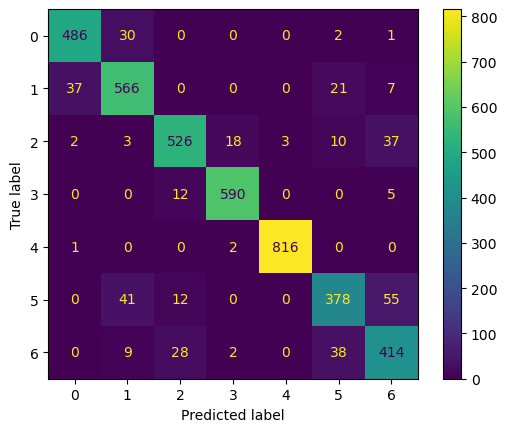

In [860]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print('Figure 4: Confusion Matrix for GradientBoosting Model')
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

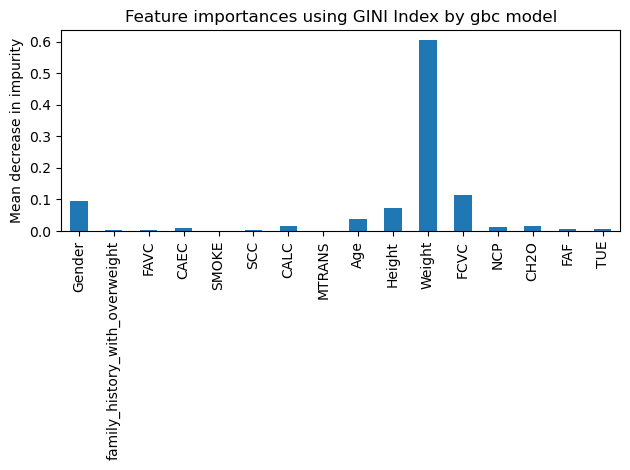

In [861]:
feature_names = x_train.columns
importances = model_gbc.feature_importances_
decisiontree_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
decisiontree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using GINI Index by gbc model")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<Axes: >

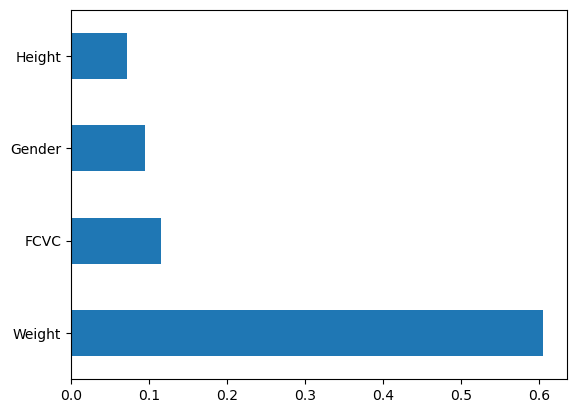

In [862]:
feat_importances = pd.Series(model_gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh',label ='sinh')


<br>
<br>
Prediction of test data with GradientBoostingClassifier

In [864]:
prediction = model_gbc.predict(test_data)

In [865]:
submission = pd.DataFrame({'id': X_test['id'], 'NObeyesdad': prediction})

In [866]:
submission.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [867]:
submission['NObeyesdad'].unique()

array([3, 5, 4, 2, 0, 1, 6])

In [868]:
submission['NObeyesdad'] = submission['NObeyesdad'].replace(to_replace=[0, 1, 2, 3, 4, 5, 6], value=[
    'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III', 'Overweight_Level_I','Overweight_Level_II'])
submission


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [869]:
submission.to_csv('submission01.csv', index=False)

<br>
<font size="5">
CONCLUSION

Exploration of Data shows feature 'Age' having a skewed right distribution with outliers, 'Weight' also a skewed right but no outliers, 'Height' being close to normal with one insignificant outlier while the rest of numeric features do not follow a normal distribution.
Exploration of Data also shows the correlation between 'Age', Height, and Weight is low (< 0.42) while other features are weakly correlated.
Both Age and Weight have wide range of values therefore will be scaled before modeling.

Common Assumptions of the four Classifiers (Decision Tree, Bagging, RandomForest, and GradientBoosting):
<br>
•	The dependent variable must have three or more unordered categories. 
<br>
•	Independence: An observation’s outcome should not influence another observation. 
<br>
•	No assumptions about Data Distribution. 
<br>
•	Strong resistance to Multicollinearity.
<br>
•	Strong resistance to data outliers.

For each classifier, the accuracy of the 10-fold regression is almost identical to the accuracy obtained from model score.

GradientBoostingClassifier yielded the best accuracy of the four classifiers on the Kaggle competition dataset. The classification errors seem to occur mostly at the weight category boundaries.

<br>
1) Results of DecisionTree Classification
 
With the use of 10 folds and 3 repeats, the DecisionTree Classification results showed a Mean Accuracy of 0.847 and very a very small standard deviation of 0.010, a fairly good result. The balance f1-scores went from low 0.68 to 1.00, an almost perfect prediction accuracy for class of Obesity Type-I.

Most prediction errors (top left and bottom right of the plot of confusion matrix) occured at the boundaries of weight classes. The DecisionTree Classifier mistakenly predicted Insufficient Weight for Normal Weight, Normal Weight for Insufficient Weight, Overweight Level I for Overweight Level II. 

<br>
2) Bagging Classifier
<br>
<br>

With the use of 10 folds and 3 repeats, the Bagging Classification results showed a Mean Accuracy of 0.890 and very a very small standard deviation of 0.007, a fairly good result. The f1-scores went from low 0.63 to 1.00, an almost perfect prediction accuracy for class of Obesity Type-I.

Most prediction errors (top left and bottom right of the plot of confusion matrix) occured at the boundaries of weight classes. The Bagging classifier mistakenly predicted Insufficient Weight for Normal Weight, Normal Weight for Insufficient Weight, Overweight Level I for Overweight Level II. 



<br>
3) Results of RandomForestClassifier
<br>
<br>
With the use of 10 folds and 3 repeats, the RandomForest Classification results showed a Mean Accuracy of 0.898 and very a very small standard deviation of 0.008, a very good result. The f1-scores went from low 0.72 to 1.00, an almost perfect prediction accuracy for class of Obesity Type-I.
<br>
<br>

Most prediction errors (upper left,bottom left, and bottom right on the plot of confusi on matrix) occured at the boundaries. The RandomForestClassifier mistakenly predict: Insufficient Weight for Normal Weight, Normal Weight for 'Overweight_Level_I', Obesity_Type_I for both  Overweight_Level_I and Overweight_Level_II,etc. 

<br>
4) Results of GradientBoosting Classification
<br>
<br>
The GradientBoosting classifier assumes that the data is or can be transformed into a linearly separable space. Since GradientBoosting is sensitive to noisy data and outliers, data set needs scaling before applying the GradientBoosting classifier.

With the use of 10 folds and 3 repeats, the GradientBoosting Classification results showed a Mean Accuracy of  0.904 and very a very small standard deviation of 0.007, a very good result. The balance f1-scores went from low 0.81 to 1.00, an almost perfect prediction accuracy for class of Obesity Type-I.
Most prediction errors (upper left,bottom left, and bottom right on the plot of confusion matrix) mostly occured at the boundaries. Linear GradientBoosting classifier mistakenly predict Insufficient Weight for Normal Weight, Overweight_Level_I for Overweight_Level_II, etc. The prediction errors might be due to the inability of GradientBoosting classifiers to handle a dataset with overlapping classes.

